In [ ]:
# Robot
# 20 x 21
# Best to be 20cm away for image recognition

# Obstacle
# 10 x 10
# Image will be on either of the 4 cardinal directions

# Grid
# Each square will represent a 10x10 square

# Dubins script source: https://github.com/FelicienC/RRT-Dubins

In [28]:
from dubins import Dubins

import matplotlib.pyplot as plt
import numpy as np

In [67]:
directions = {
    'North': np.pi/2,
    'East': 2*np.pi,
    'South': (3*np.pi)/2,
    'West': np.pi
}

obstacleList = [(11, 9, directions['South']),
                (7, 15, directions['South']),
                (6, 7, directions['East']),
                (16, 14, directions['East'])]

initPosition = (1, 1, directions['North'])

# First element represents the inital position the RC will be in
# Positions RC is expected to be in to accurately capture the image of the obstacles
# Obstacle Orientation to RC Position
# North:    Y-Axis + 2, Directions to be South
# East:     X-Axis + 2, Directions to be West
# South:    Y-Axis - 2, Directions to be North
# West:     X-Axis - 2, Directions to be East
positions = [initPosition,
            (11, 7, directions['North']),
            (7, 13, directions['North']),
            (8, 7, directions['West']),
            (18, 14, directions['West'])]

# Possible positions RC will complete its pathing in
finalPositions = [(1, 1, directions['South']),
                  (1, 1, directions['West'])]

In [36]:
obstacleList

[(11, 9, 4.71238898038469),
 (7, 15, 4.71238898038469),
 (6, 7, 6.283185307179586),
 (16, 14, 6.283185307179586)]

In [70]:
local_planner = Dubins(2.5, .5)

adjMat = []

for start in positions:
    paths = []

    for dst in positions:
        if dst != start and dst != initPosition:
            # Tuple: (Total_Dist, Specific_Dist, Pathing)
            paths.append(local_planner.dubins_path(start, dst))

    if start != initPosition:
        paths.append(min(local_planner.dubins_path(start, finalPositions[0]), local_planner.dubins_path(start, finalPositions[1])))

    adjMat.append(paths)

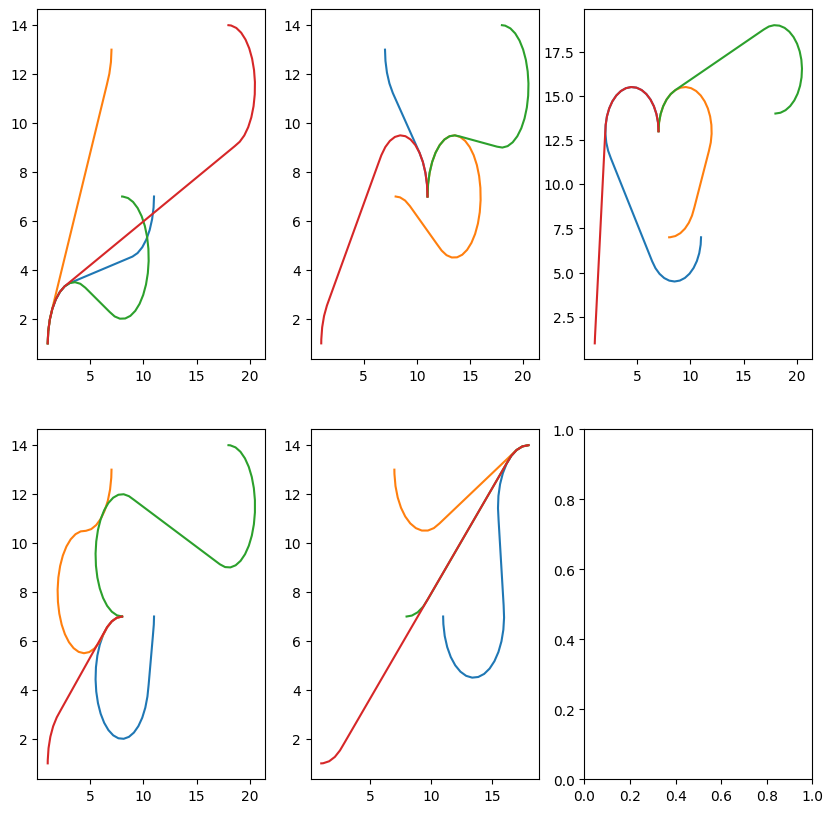

In [71]:
plt.rcParams['figure.figsize'] = [10, 10]
# plt.grid()
# plt.xticks(np.arange(0, 19, 1.0))
# plt.yticks(np.arange(0, 19, 1.0))

fig, ax = plt.subplots(2, 3)

for path in adjMat[0]:
    pathing = path[2]
    ax[0, 0].plot(pathing[:, 0], pathing[:, -1])

for path in adjMat[1]:
    pathing = path[2]
    ax[0, 1].plot(pathing[:, 0], pathing[:, -1])

for path in adjMat[2]:
    pathing = path[2]
    ax[0, 2].plot(pathing[:, 0], pathing[:, -1])

for path in adjMat[3]:
    pathing = path[2]
    ax[1, 0].plot(pathing[:, 0], pathing[:, -1])

for path in adjMat[4]:
    pathing = path[2]
    ax[1, 1].plot(pathing[:, 0], pathing[:, -1])

plt.show()